# Escuela Politécnica Nacional

# Proyecto 2do Bimestre

# Analisis de delitos penales obtenidos de la Fiscalía General del Estado Ecuatoriano a traves de la herramienta Scrapy con python

## Miguel Esteban Álvarez Naranjo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Obtencion de los datos

### para la obtencion de los datos se realizo scrapy a la página de la fiscalia general del estado: https://www.fiscalia.gob.ec/consulta-de-noticias-del-delito/

### la url se obtuvo llenando el campo de busqueda con nombres comunes del ecuador

![paginaFISCALIA](Captura.png)
![url](Captura2.png)


In [75]:
path_delitosEC = 'C:/Users/MIGUELESTEBAN/Documents/GitHub/py-alvarez-naranjo-miguel-esteban/Proyecto 2do Bim/scrapyDelitosEC/delitosEC.json'
df = pd.read_json(path_delitosEC)
df.rename(columns = {'DELITO:':'DELITO'}, inplace = True) 
# dividir la fecha en anios, mes y dia
df1 = df['FECHA'].apply(lambda x: pd.Series(x.split('-')))
df1.rename(columns = {0:'ANIO', 1:'MES', 2:'DIA'}, inplace = True) 
# dividir la columna lugar en provincia y canton
df2 = df['LUGAR'].apply(lambda x: pd.Series(x.split('-')))
df2.rename(columns = {0:'PROVINCIA', 1:'CANTON'}, inplace = True)
# dividir la hora en horas minutos y segundos
df3 = df['HORA'].apply(lambda x: pd.Series(x.split(':')))
df3.rename(columns = {0:'HORAS_SEPARADA', 1:'MINUTOS', 2:'SEGUNDOS'}, inplace = True) 
# unimos los dataframes

df_unido = pd.merge(df, df1, left_index=True, right_index=True)
df_unido2 = pd.merge(df_unido, df2, left_index=True, right_index=True)
df_completo = pd.merge(df_unido2, df3, left_index=True, right_index=True)
df_completo

,DELITO,FECHA,HORA,LUGAR,ANIO,MES,DIA,PROVINCIA,CANTON,HORAS_SEPARADA,MINUTOS,SEGUNDOS
0,ACCIDENTE DE TRANSITO CON SOLO DANOS MATERIALE...,2012-02-11,11:26:15,SANTO DOMINGO DE LOS TSACHILAS - SANTO DOMINGO,2012,02,11,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,11,26,15
1,ROBO,2016-11-16,15:47:22,GUAYAS - GUAYAQUIL,2016,11,16,GUAYAS,GUAYAQUIL,15,47,22
2,RECEPTACION,2016-04-04,13:32:06,EL ORO - HUAQUILLAS,2016,04,04,EL ORO,HUAQUILLAS,13,32,06
3,ESTAFA,2016-05-03,17:07:41,CHIMBORAZO - RIOBAMBA,2016,05,03,CHIMBORAZO,RIOBAMBA,17,07,41
4,MUERTE CULPOSA,2016-07-14,15:55:19,MANABI - SAN VICENTE,2016,07,14,MANABI,SAN VICENTE,15,55,19
5,TRAFICO DE INFLUENCIAS,2016-10-25,15:37:17,AZUAY - CUENCA,2016,10,25,AZUAY,CUENCA,15,37,17
6,DAÃ‘OS MATERIALES,2017-09-19,09:30:19,PICHINCHA - QUITO,2017,09,19,PICHINCHA,QUITO,09,30,19
7,HURTO,2018-08-02,11:28:38,IMBABURA - IBARRA,2018,08,02,IMBABURA,IBARRA,11,28,38
8,RECEPTACION,2018-08-02,12:15:37,PICHINCHA - CAYAMBE,2018,08,02,PICHINCHA,CAYAMBE,12,15,37
9,LESIONES CAUSADAS POR ACCIDENTE DE TRANSITO,2019-03-13,11:27:36,LOS RIOS - SAN JACINTO DE BUENA FE,2019,03,13,LOS RIOS,SAN JACINTO DE BUENA FE,11,27,36


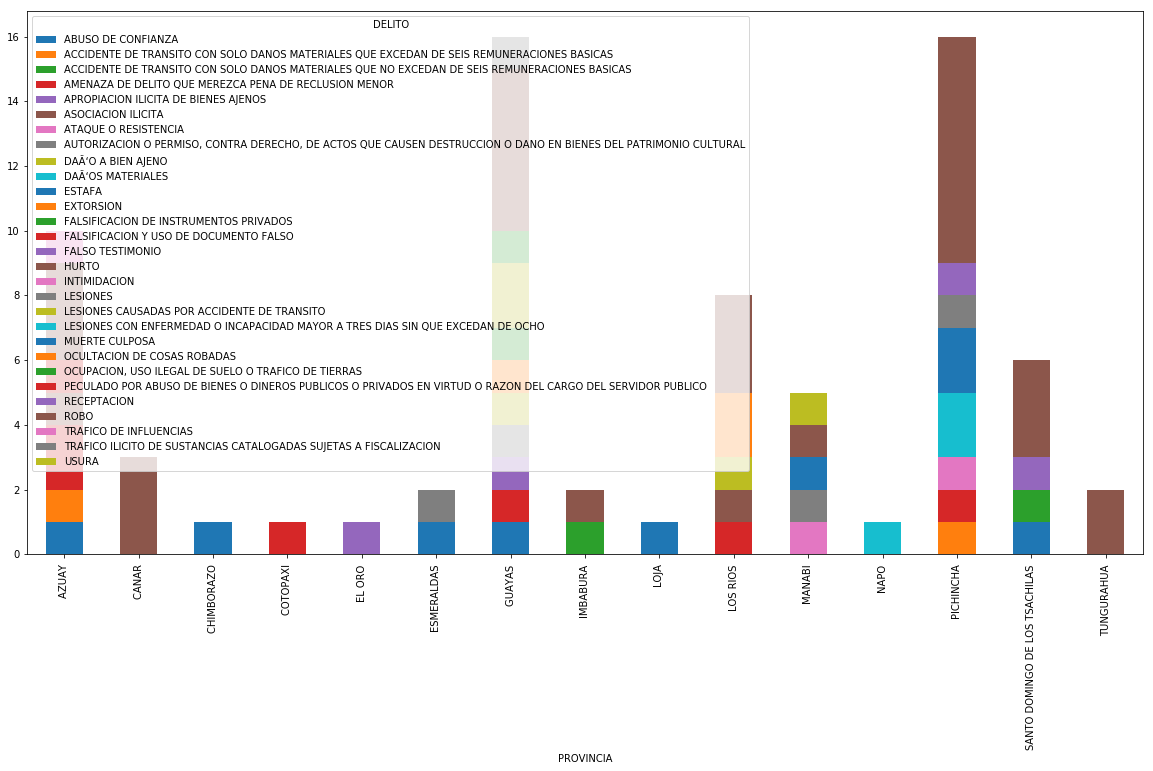

In [76]:
df_completo.groupby(['PROVINCIA','DELITO']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

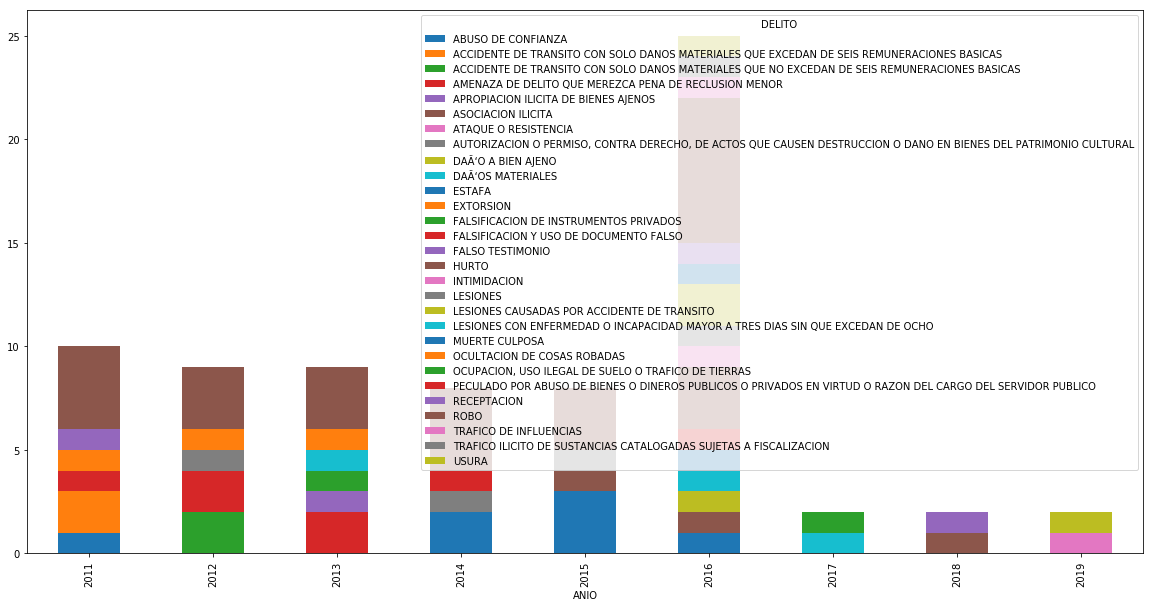

In [77]:
provincias = pd.unique(df_completo['PROVINCIA'])
Anios = pd.unique(df_completo['ANIO'])
Anios
df_completo.groupby(['ANIO','DELITO']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

In [78]:
df_desde2017 = df_completo.loc[df_completo.ANIO >= '2019']


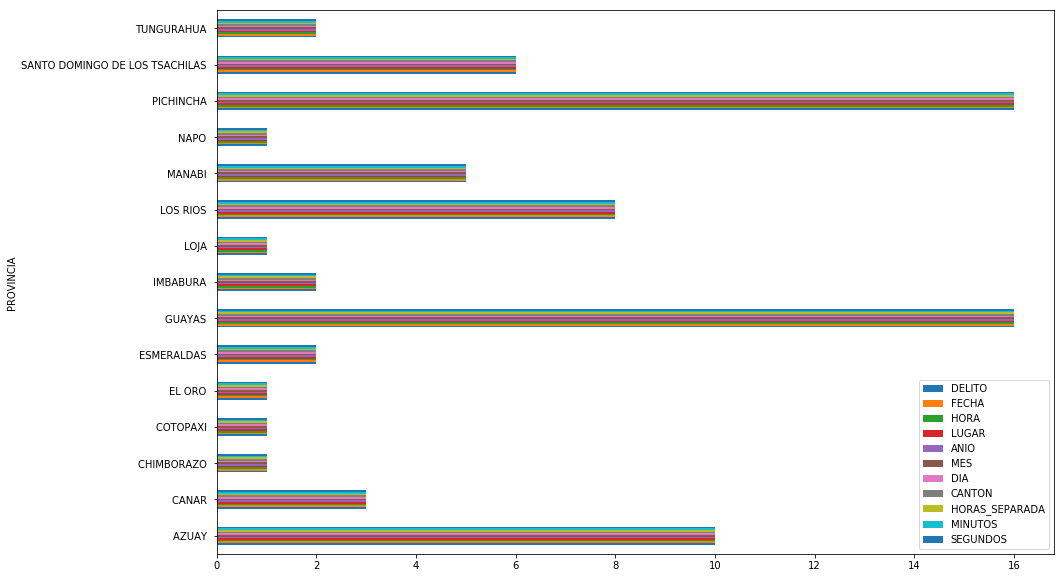

In [79]:
cantidadOfensas = df_completo.copy().groupby('PROVINCIA')

df_cantidadOfensas = pd.DataFrame(cantidadOfensas.count()).sort_values('PROVINCIA')

df_cantidadOfensas.plot(kind='barh', figsize=(15,10))

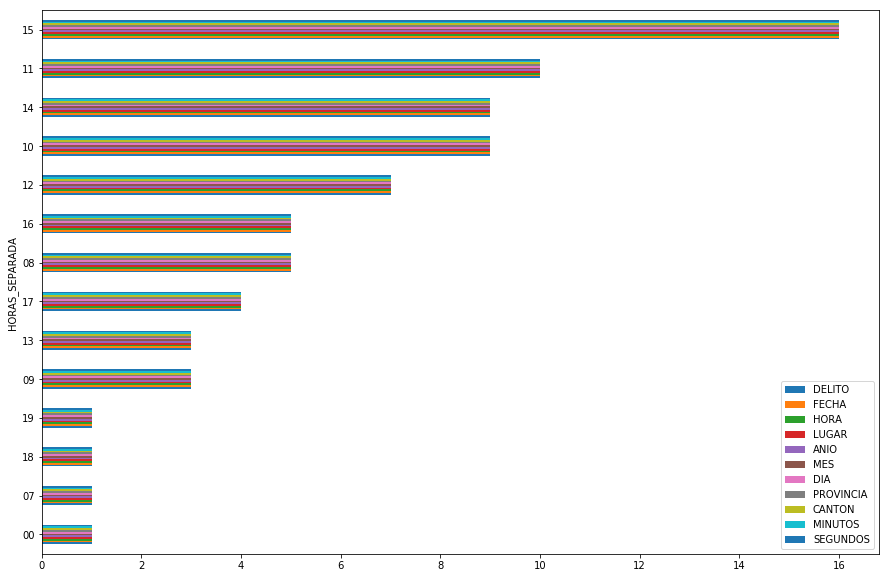

In [86]:
cantidadOfensas = df_completo.copy().groupby('HORAS_SEPARADA')

df_cantidadOfensas = pd.DataFrame(cantidadOfensas.count()).sort_values('PROVINCIA')

df_cantidadOfensas.plot(kind='barh', figsize=(15,10))

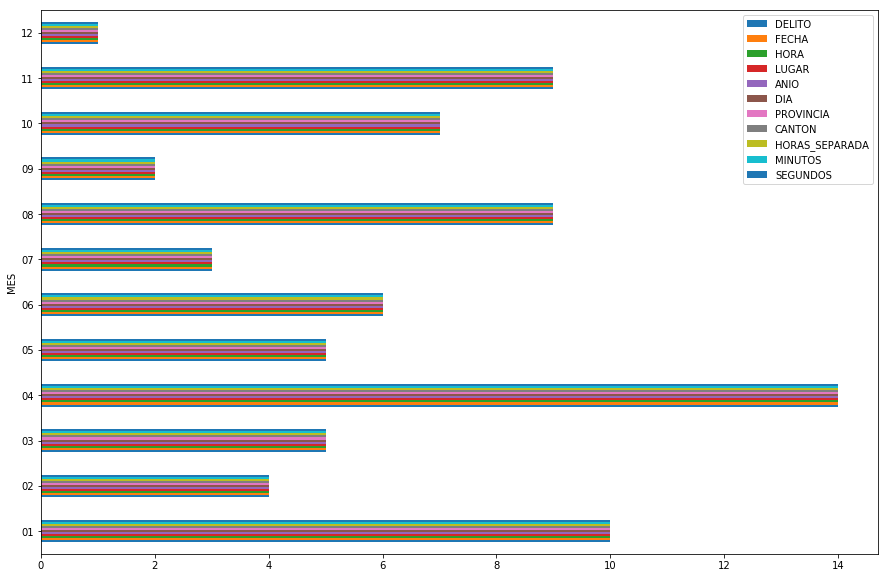

In [82]:
cantidadOfensas = df_completo.copy().groupby('MES')

df_cantidadOfensas = pd.DataFrame(cantidadOfensas.count()).sort_values('PROVINCIA')

df_cantidadOfensas.plot(kind='barh', figsize=(15,10))